In [1]:
import numpy as np
import pandas as pd
import math
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/Hanya/Documents/dash_price.csv',index_col='Date',parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,728.99,738.74,685.04,685.04,"126,208,000","5,754,970,000"
2018-02-19,687.70,731.11,687.22,728.73,"89,328,600","5,427,640,000"
2018-02-18,744.09,747.42,673.57,689.28,"96,752,600","5,871,020,000"
2018-02-17,699.13,748.89,693.64,742.16,"116,106,000","5,515,090,000"
2018-02-16,702.53,722.02,684.28,698.86,"100,343,000","5,540,570,000"


In [5]:
df.index

DatetimeIndex(['2018-02-20', '2018-02-19', '2018-02-18', '2018-02-17',
               '2018-02-16', '2018-02-15', '2018-02-14', '2018-02-13',
               '2018-02-12', '2018-02-11',
               ...
               '2014-02-23', '2014-02-22', '2014-02-21', '2014-02-20',
               '2014-02-19', '2014-02-18', '2014-02-17', '2014-02-16',
               '2014-02-15', '2014-02-14'],
              dtype='datetime64[ns]', name='Date', length=1468, freq=None)

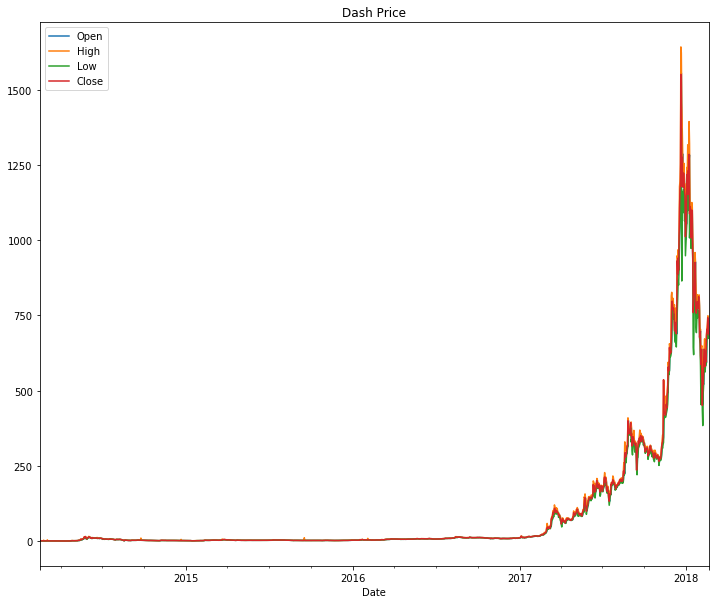

In [6]:
df.plot(figsize=(12,10),title='Dash Price')

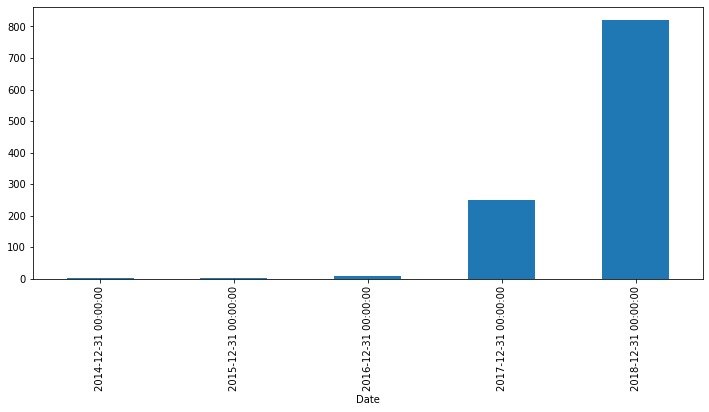

In [7]:
df['Close'].resample('Y').mean().plot.bar(figsize=(12,5))

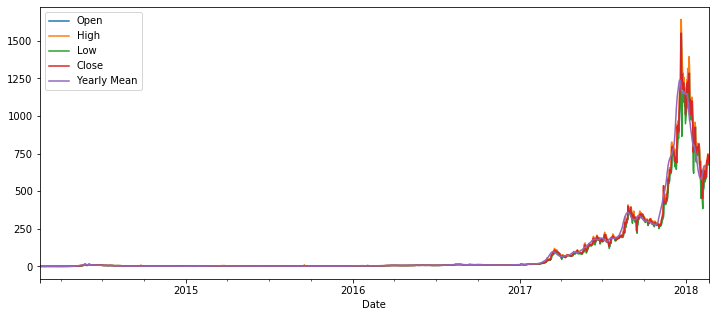

In [8]:
df['Yearly Mean']=df['Close'].rolling(window=12).mean()
df.plot(figsize=(12,5))

### Augmented Dickey Fuller Test 1

In [9]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['Close'])

C:\Users\Hanya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.44552506854194707, True)

### Augmented Dickey Fuller Test 2

In [11]:
from statsmodels.tsa.stattools import adfuller
series_litecoin = df['Close'].values
result = adfuller(series_litecoin, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key,value in result[4].items():
      print('Critical Values: ')
      print(f'{key},{value}')

ADF Statistic: -4.103507816367895
n_lags: 0.0009556744282455467
p-value: 0.0009556744282455467
Critical Values: 
1%,-3.434889827343955
Critical Values: 
5%,-2.863545026607168
Critical Values: 
10%,-2.5678374612882515


Given that the dataset exhibits a p-value lower than the 5% significance level, the null hypothesis can be rejected and conclude stationarity

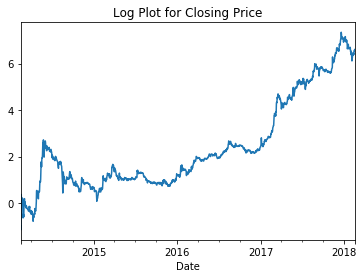

In [13]:
lnclose=np.log(df['Close'])
lnclose
lnclose.plot(title='Log Plot for Closing Price')
#adjusting for volatility

In [14]:
ln_list = lnclose.to_list()

In [15]:
from statsmodels.tsa.stattools import acf,pacf
import pandas as pd

C:\Users\Hanya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


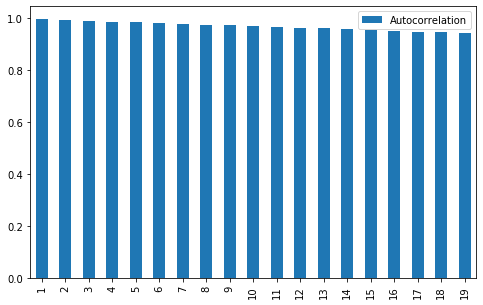

In [16]:
acf_1 = acf(lnclose)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Gentle decrease downwards for each lag

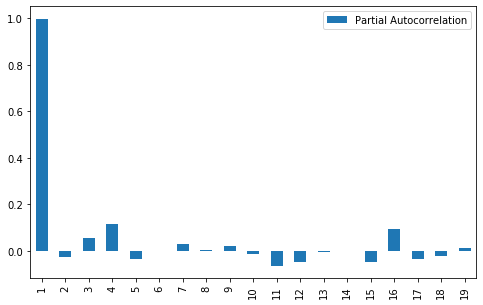

In [17]:
pacf_1 = pacf(lnclose)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Sudden decrease downwards between first and subsequent lags suggesting we have a stationary AR1 time series

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Dash Coin Integrated by order of 1')

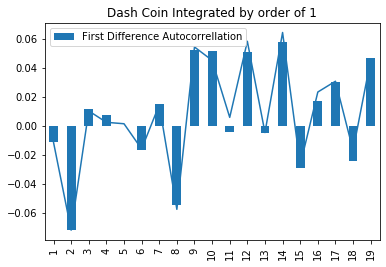

In [19]:
lnclose_diff=lnclose-lnclose.shift()
diff=lnclose_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrellation']
test_df.index +=1
test_df.plot.bar()
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.title('Dash Coin Integrated by order of 1')
#Integrated order of 1

In [20]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(lnclose)

C:\Users\Hanya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.6462701593841745, True)

In [22]:
import matplotlib.pyplot as plt

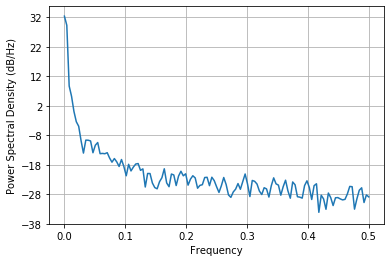

In [26]:
from spectrum import *
psd = WelchPeriodogram(ln_list, 256)

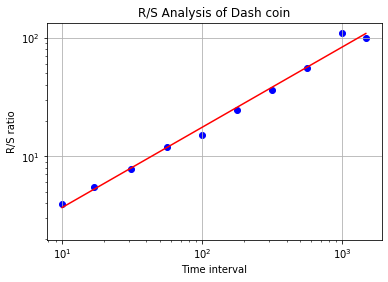

H=0.6795, c=0.7682


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

series = ln_list

H, c, data = compute_Hc(series, simplified=True)

# Plot
f, g = plt.subplots()
g.plot(data[0], c*data[0]**H, color="red")
g.scatter(data[0], data[1], color="blue")
g.set_xscale('log')
g.set_yscale('log')
g.set_xlabel('Time interval')
g.set_ylabel('R/S ratio')
g.grid(True)
plt.title('R/S Analysis of Dash coin')
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [29]:
import nolds

In [45]:
h = nolds.dfa(ln_list)

In [46]:
h

0.6228105731780886

In [47]:
print ('        #### Hurst Calculation Results for Dash #####    ')
print ('============================================================')
print ('  DFA Hurst Parameter Calculation : ',h)
print ('  R/S Analysis Hurst  Calculation : ',H)

        #### Hurst Calculation Results for Dash #####    
  DFA Hurst Parameter Calculation :  0.6228105731780886
  R/S Analysis Hurst  Calculation :  0.6794872483421278
